VAR : capture the relationship between multiple features as they change over time 

In [1]:
# necessary lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [14]:
# reading data 
df= pd.read_excel('combine_19_20_21_sale.xlsx',index_col=1,parse_dates=True)

In [15]:
df.head()

,Unnamed: 0,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
Created Date,,,,,,,
2019-01-03,0,68,90,42,6583.000000,100885.000000,100885.0
2019-01-04,1,69,85,46,6542.500000,112823.177778,25694.2
2019-01-05,2,53,82,22,11057.800000,92705.000000,92705.0
2019-01-06,3,58,16,12,5815.000000,41483.776667,14062.0
2019-01-07,4,60,89,63,7918.583333,108119.473333,109814.0


In [16]:
# droping unwanted columns

df=df.drop(['Unnamed: 0'],axis=1)

In [17]:
df.head()

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
Created Date,,,,,,
2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [18]:
# visulaizing each feature

color_list= [ 'blue','green','orange','yellow','red','purple','brown','pink','gray','olive','cyan','magenta','black','indigo','aqua']


def vis(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size= len(features)
    fig,axes=plt.subplots(nrows= int(np.ceil(feature_size/2)),ncols=2,figsize= (14,feature_size*2),dpi=80,facecolor='w',edgecolor='k')
    
    for i in range(feature_size):
        key= features[i]
        c= color_list[i% (len(color_list))]
        t_data=data[key]
        t_data.head()
        
        
        ax=t_data.plot(ax= axes[i//2,i%2],color=c,title="{}".format(key),rot=25)
        
        ax.legend([key])
    plt.tight_layout()

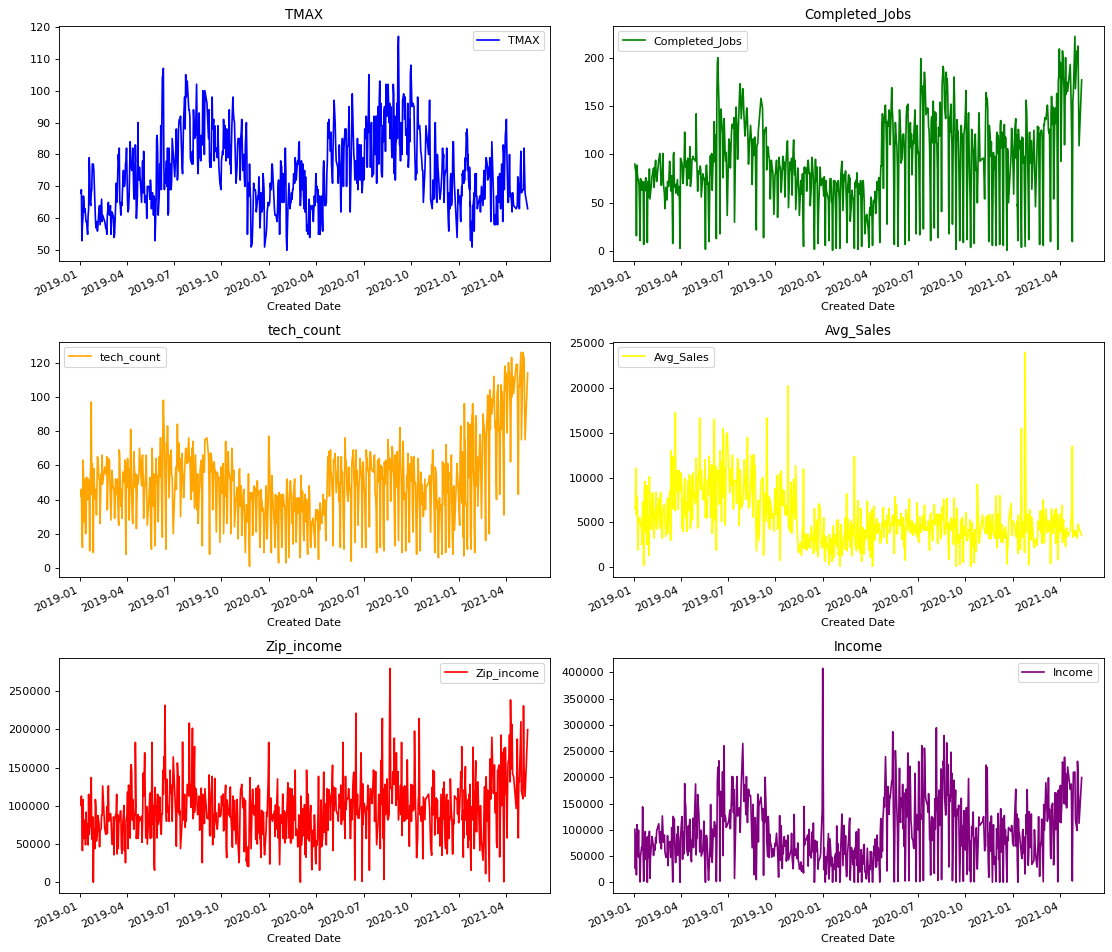

In [19]:
vis(df)

# Augmented Dickey Fuller test

It is used to test time series is stationary or not 

It's statistical test 

Null Hypothesis : Series possesses a unit root and hence series is Not stationary

Alternate Hypothesis : Series is Stationary

In [20]:
# null hypothesis checking 

for i in range(len(df.columns)):
    result= adfuller(df[df.columns[i]])
    
    if result[1]>0.05:
        print(' {} : Series is not stationary'.format(df.columns[i]))
    else:
        print(' {} : Series is stationary'.format(df.columns[i]))

 TMAX : Series is stationary
 Completed_Jobs : Series is not stationary
 tech_count : Series is not stationary
 Avg_Sales : Series is not stationary
 Zip_income : Series is stationary
 Income : Series is stationary


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE512DE710>,
      dtype=object)

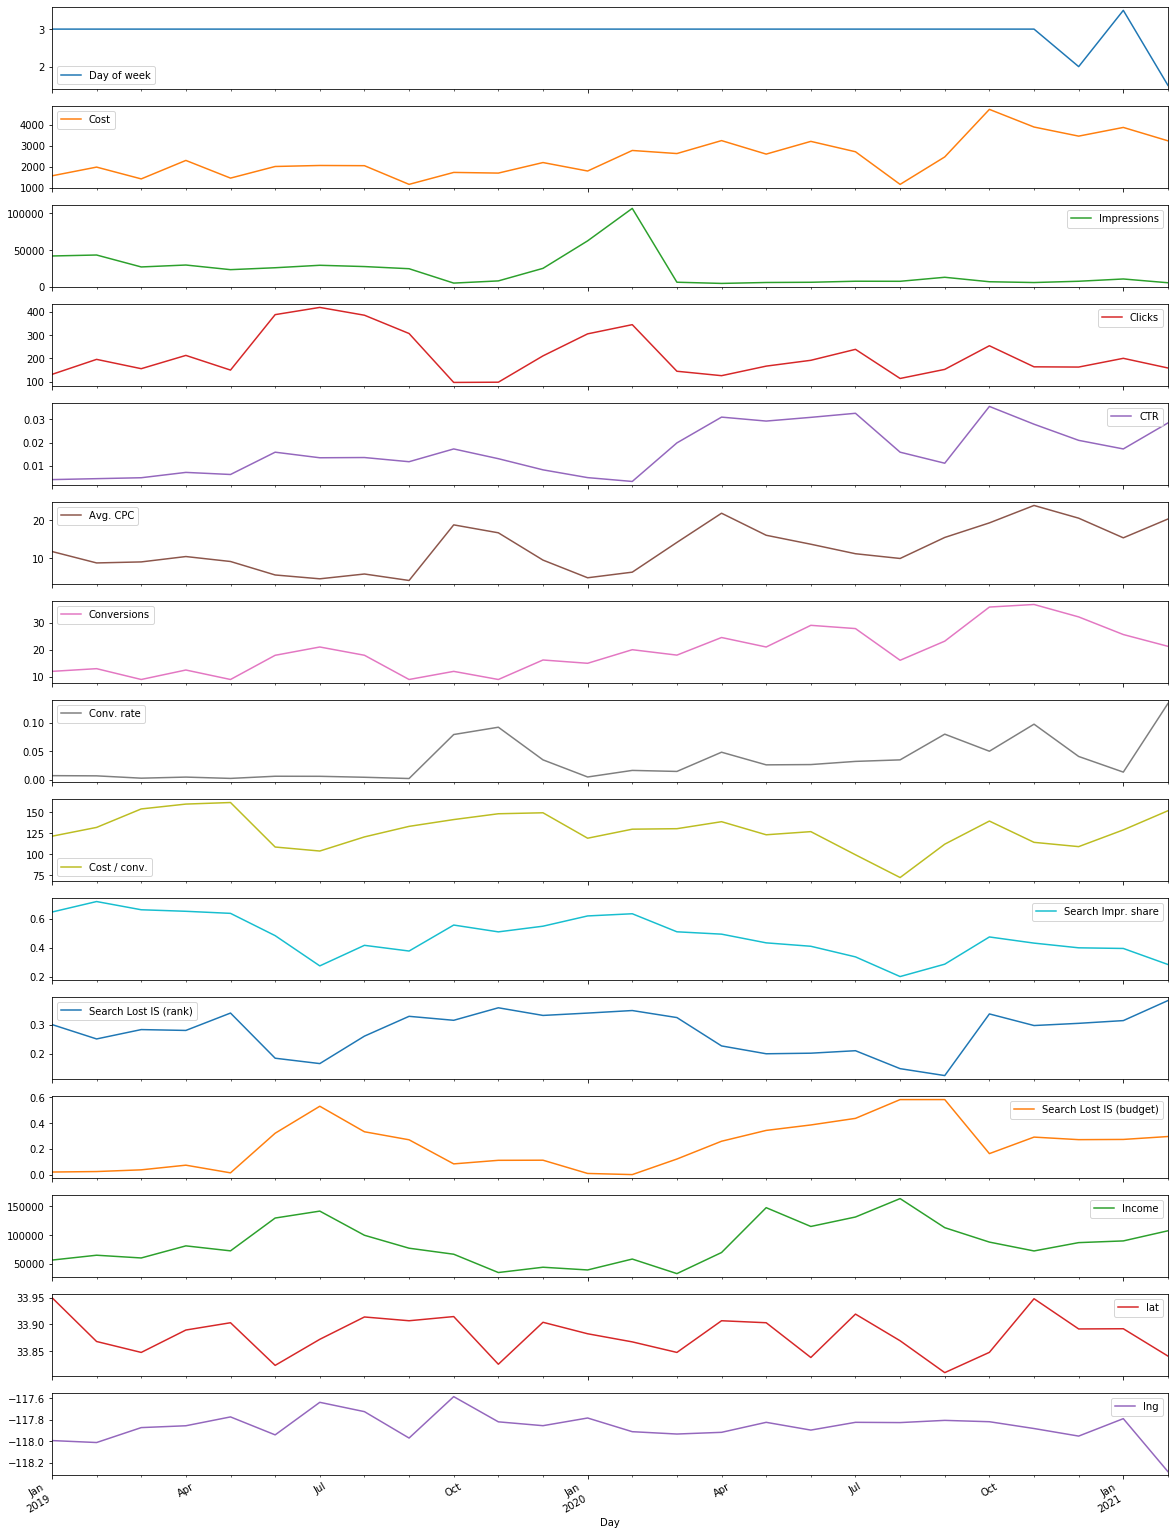

In [43]:


df.resample('M').median().plot(subplots=True,figsize=(20,30))

In [21]:
df.columns

Index(['TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income'],
      dtype='object')

In [22]:
df['Completed_Jobs']=df['Completed_Jobs']-df['Completed_Jobs'].shift(1)

<AxesSubplot:xlabel='Created Date'>

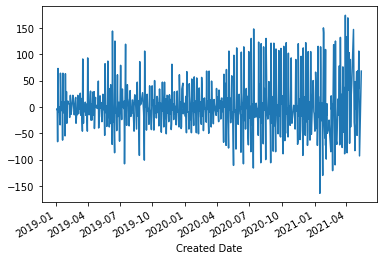

In [23]:
df['Completed_Jobs'].plot()

In [26]:
df['Avg_Sales']=df['Avg_Sales']-df['Avg_Sales'].shift(1)

<AxesSubplot:xlabel='Created Date'>

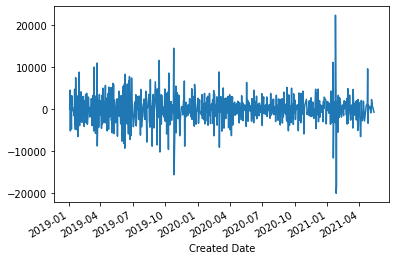

In [27]:
df['Avg_Sales'].plot()

In [ ]:
df['tech_count']=df['tech_count']-df['tech_count'].shift(1)

In [30]:
df=df.dropna()

In [31]:
# again doing null hypothesis checking 

for i in range(len(df.columns)):
    result= adfuller(df[df.columns[i]])
    
    if result[1]>0.05:
        print(' {} : Series is not stationary'.format(df.columns[i]))
    else:
        print(' {} : Series is stationary'.format(df.columns[i]))

 TMAX : Series is stationary
 Completed_Jobs : Series is stationary
 tech_count : Series is stationary
 Avg_Sales : Series is stationary
 Zip_income : Series is stationary
 Income : Series is stationary


Now everything is stationary

# Granger causality test

if a signal X1(independet features)  "Granger-causes" (or "G-causes") a signal X2(dependent feature), then past values of X1 should contain information that helps predict X2

Checking relation between input and output variable

In [34]:
max_lags=5
y= "Income"

In [35]:
for i in range(len(df.columns)):
    results=grangercausalitytests(df[[y,df.columns[i]]],max_lags,verbose=False)
    p_values= [round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('column- {} : P_Values - {}'.format(df.columns[i],p_values))
    

column- TMAX : P_Values - [0.0, 0.0001, 0.0001, 0.0005, 0.0105]
column- Completed_Jobs : P_Values - [0.0615, 0.0, 0.0, 0.0, 0.0]
column- tech_count : P_Values - [0.0015, 0.0, 0.0, 0.0, 0.0]
column- Avg_Sales : P_Values - [0.6051, 0.8594, 0.2491, 0.3762, 0.4447]
column- Zip_income : P_Values - [0.2003, 0.4477, 0.6986, 0.8082, 0.7475]
column- Income : P_Values - [1.0, 1.0, 1.0, 1.0, 1.0]


In [36]:
df.columns

Index(['TMAX', 'Completed_Jobs', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income'],
      dtype='object')

In [37]:
df_input=df[['TMAX', 'Completed_Jobs', 'tech_count', 'Income']]

In [38]:
df_input.head()


,TMAX,Completed_Jobs,tech_count,Income
Created Date,,,,
2019-01-04,69,-5.0,4.0,25694.2
2019-01-05,53,-3.0,-24.0,92705.0
2019-01-06,58,-66.0,-10.0,14062.0
2019-01-07,60,73.0,51.0,109814.0
2019-01-08,67,-10.0,-9.0,67063.4


In [39]:
# splitting the train and test 

df_train= df_input[:int(0.9*(len(df_input)))]
df_test= df_input[int(0.9*(len(df_input))):]

In [40]:
df_train.shape

(652, 4)

In [41]:
df_test.shape

(73, 4)

In [42]:
model = VAR(df_train)

for i in range(30):
    results=model.fit(i+1)
    print('Order= ',i+1)
    print('AIC :',results.aic)
    print('BIC: ',results.bic)

C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


Order=  1
AIC : 37.78135153438393
BIC:  37.91894015626438
Order=  2
AIC : 37.482952842057216
BIC:  37.73090823446341
Order=  3
AIC : 37.31660872243445
BIC:  37.675195010983934
Order=  4
AIC : 37.19128781626042
BIC:  37.660770173285044
Order=  5
AIC : 36.99034177885233
BIC:  37.57098642914302
Order=  6
AIC : 36.92663139023699
BIC:  37.61870561682873
Order=  7
AIC : 36.90921395254783
BIC:  37.71298610254521
Order=  8
AIC : 36.913087976335035
BIC:  37.82882746677879
Order=  9
AIC : 36.92327423735177
BIC:  37.95125156112652
Order=  10
AIC : 36.939050951048934
BIC:  38.07953768283266
Order=  11
AIC : 36.94194961685585
BIC:  38.195218419111264
Order=  12
AIC : 36.96011950404947
BIC:  38.326444133057805
Order=  13
AIC : 36.97492082301371
BIC:  38.454576134951175
Order=  14
AIC : 36.99716851800286
BIC:  38.590430475060245
Order=  15
AIC : 37.02519236099352
BIC:  38.732338037539215
Order=  16
AIC : 37.053422981707925
BIC:  38.87473057049477
Order=  17
AIC : 37.07200389141821
BIC:  39.0077527098

In [43]:
model.select_order(30).summary()

,AIC,BIC,FPE,HQIC
0,39.42,39.45,1.322e+17,39.43
1,37.79,37.94,2.591e+16,37.85
2,37.49,37.75,1.918e+16,37.59
3,37.33,37.70,1.626e+16,37.47
4,37.20,37.68,1.427e+16,37.39
5,37.01,37.61*,1.185e+16,37.24
6,36.95,37.66,1.113e+16,37.23*
7,36.93*,37.75,1.090e+16*,37.25
8,36.93,37.87,1.092e+16,37.29
9,36.93,37.99,1.098e+16,37.34


In [44]:
model_2=VAR(df_train)
results_2= model.fit(5)

C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\vksva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [45]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 31, May, 2021
Time:                     21:46:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    40.7866
Nobs:                     622.000    HQIC:                   38.6778
Log likelihood:          -14658.2    FPE:                1.67522e+16
AIC:                      37.3372    Det(Omega_mle):     8.22772e+15
--------------------------------------------------------------------
Results for equation TMAX
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     11.677109         3.718099            3.141           0.002
L1.TMAX                    0.511848         0.044747           11.439           0.000
L1.Completed_Jobs          0.002764      

In [46]:
lag= results_2.k_ar

In [47]:
lag

5

In [58]:
te=results_2.forecast(df_train.values[-lag:],steps=73)

In [60]:
d=pd.DataFrame(te,columns=['TMAX','Completed_Jobs','tech_count','Income'])

In [61]:
d

,TMAX,Completed_Jobs,tech_count,Income
0,74.826719,-4.966655,7.972539,75913.527007
1,74.970283,8.756170,1.574896,98341.126221
2,77.903879,19.702113,10.558391,114022.976501
3,75.231656,-30.298849,-21.694541,85151.364277
4,74.993184,1.607162,8.032763,80789.314519
...,...,...,...,...
68,75.711006,0.050639,0.041186,93198.992004
69,75.711538,0.050349,0.041010,93201.297012
70,75.712047,0.050016,0.040861,93203.221664
71,75.712531,0.049884,0.040835,93204.867347


In [55]:
df_test[0:10]

,TMAX,Completed_Jobs,tech_count,Income
Created Date,,,,
2021-01-21,69,-24.0,13.0,55735.08
2021-01-22,64,7.0,3.0,86421.80
2021-03-25,74,37.0,19.0,169704.71
2021-01-24,59,-130.0,-79.0,15788.00
2021-01-27,64,141.0,72.0,93402.16
2021-01-28,64,-25.0,-6.0,176747.02
2021-01-30,68,-59.0,-45.0,32502.40
2021-04-02,91,133.0,58.0,184596.28
2021-02-01,70,-73.0,-29.0,134536.85


In [62]:
y_hat=d['Income']
y_original=df_test['Income']

In [63]:
from sklearn import metrics

In [64]:
np.sqrt(metrics.mean_squared_error(y_original,y_hat))

66906.24562021287